### This is my improved version of the analysis and prediction of data on fraudlent transactions.

In [ ]:
# The SMOTE-ENN takes around 30+ minutes to run each time. I would recommend running the notebook on GPU, or view the notebook
# on my Kaggle/Github account.

##### Please find the detailed explanation at the end of the notebook.

In [1]:
# Prediction of Fraudlent transactions.

In [2]:
# Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Reading data into a DataFrame

In [5]:
df = pd.read_csv('C:/Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
df.shape

(6362620, 11)

In [7]:
# Contains 6362620 rows and 11 columns

In [8]:
# Viewing the head and tail of the df to get a basic idea of the dataset.

In [9]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [10]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
# 5 Float, 3 int and 3 object type columns

# Null Values

In [13]:
# Checking for null values.

In [14]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
# No obvious null values. We will check for numerical discrepancies later.

In [16]:
# Checking duplicate values.

In [17]:
df.duplicated().sum()

0

In [18]:
# No duplicate values.

In [19]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.397246,142.331971,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.903549,603858.231463,0.0,13389.57,74871.94,208721.4775,92445516.64
nameOrig,6362620,6353307,C1902386530,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.104074,2888242.673007,0.0,0.0,14208.0,107315.175,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.668579,2924048.502971,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.66652,3399180.112969,0.0,0.0,132705.665,943036.7075,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.398202,3674128.942094,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.001291,0.035905,0.0,0.0,0.0,0.0,1.0


In [20]:
# From the above descriptive statistics - 

# There are 5 unique types of transactions. CASH_OUT is the most frequent.
# The mean and median for Amount have too much difference. Hence, there is presence of outliers.
# 25th percentile of all the balance columns shows that a lot of data in those columns is 0

# The number of unique values in nameOrig is more than the number of unique values in nameDest. Hence, the unique number of people 
# sending money is more than the unique number of people receiving money.




In [21]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [22]:
df.isFraud.value_counts()/len(df)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [23]:
# Data is highly imbalanced. There is only 0.0012% fraud transactions, while 99.87% transactions are not fraud.

In [24]:
# Plotting the transactions.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


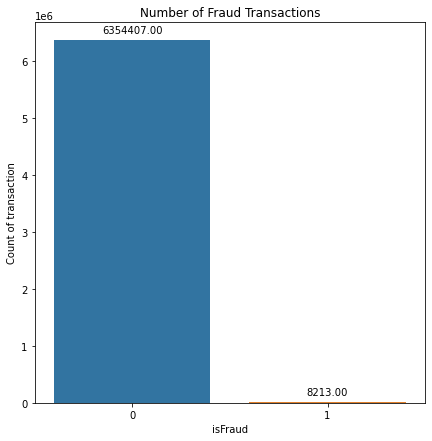

In [25]:
plt.figure(figsize=(7,7))
fig = sns.countplot(df.isFraud)
fig.set(title='Number of Fraud Transactions')
fig.set_ylabel("Count of transaction")
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [26]:
df_type=df.type.value_counts().head(5)
df_type

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Text(0.5, 1.0, 'Percentage distribution of transactions by type')

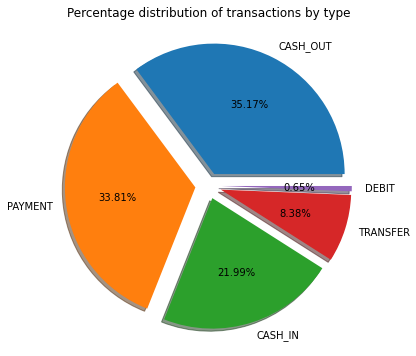

In [27]:
plt.figure(figsize=(6,6))
labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT']
plt.pie(df_type,labels=labels,autopct='%.2f%%',shadow=True,explode=[0.1]*len(labels))
plt.title('Percentage distribution of transactions by type')

In [28]:
# Number of Fraud and non-Fraud transactions by type

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


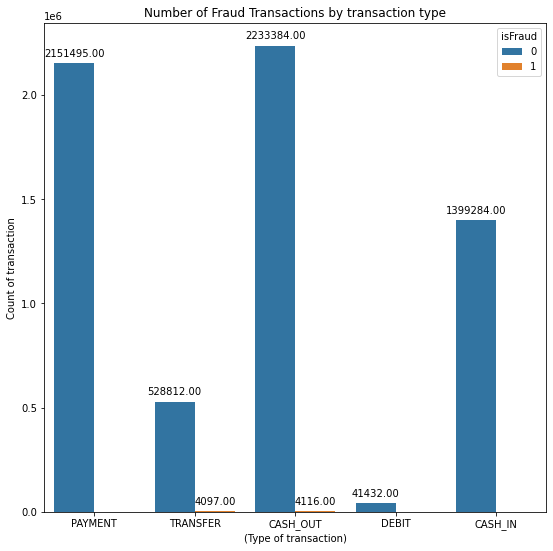

In [29]:
plt.figure(figsize=(9,9))
fig = sns.countplot(df.type,hue='isFraud',data=df)
fig.set(title='Number of Fraud Transactions by transaction type')
fig.set_xlabel("(Type of transaction)")
fig.set_ylabel("Count of transaction")
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [30]:
df.groupby('isFraud')['type'].value_counts()

isFraud  type    
0        CASH_OUT    2233384
         PAYMENT     2151495
         CASH_IN     1399284
         TRANSFER     528812
         DEBIT         41432
1        CASH_OUT       4116
         TRANSFER       4097
Name: type, dtype: int64

In [31]:
# Only CASH_OUT and TRANSFER type of transactions have fraus transactions.

In [32]:
# Creating new dataframe with only Fraud transactions

In [33]:
df_isfraud = df[df.isFraud==1]

In [34]:
df_isfraud.nunique()

step               741
type                 2
amount            3977
nameOrig          8213
oldbalanceOrg     4094
newbalanceOrig     145
nameDest          8169
oldbalanceDest    2863
newbalanceDest    4067
isFraud              1
isFlaggedFraud       2
dtype: int64

In [35]:
# nameOrig has 8213 unique values and nameDest has 8169 unique values. There does not seem to be any unique correlation between
# these 2 columns.

<AxesSubplot:>

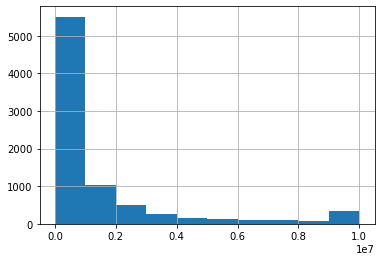

In [36]:
df_isfraud.amount.hist()

In [37]:
# Most of the fraud transactions are below $200,000.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

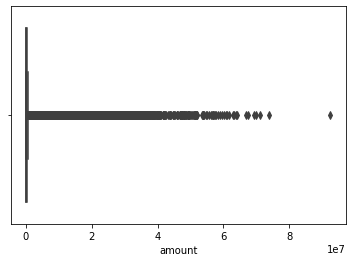

In [38]:
sns.boxplot(df.amount)

In [39]:
# Boxplot shows that there are too many outliers. We will treat the outliers by scaling, later on in the notebook.

In [40]:
# Heatmap of correlation of all numeric variables

<AxesSubplot:>

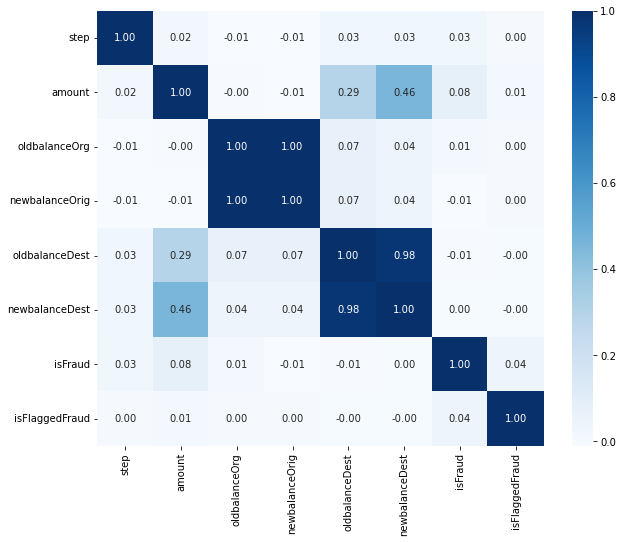

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="Blues",annot=True,fmt='.2f')

In [42]:
# There is very high correlation between oldbalanceOrg and newbalanceOrig.
# There is also very high correlation between oldbalanceDest and newbalanceDest.
# There is multi-collinearity.

# We will be using Logistic Regression. The basic principle suggests that there should be no multi-collinearity.
# Having multicollinearity would mean that the beta coefficients are dependent on each other and any change in one will
# inadvertently result in a change in the highly correlated variable.

# Since they are so highly correlated features, dropping one of them is the a good way to go forward,
# as keeping both of them will lead to undesirable results.

In [43]:
# We will be dropping two of the multicollinear features, and nameOrig and nameDest as they are irrelevant to the prediction.

# We will also be dropping the isFlaggedFraud column, as it is irrelevant. It is not correlated to any column.
# And, the description of the dataset stated that the isFlaggedFraud is only an indicator of transactions of 
# value greater $200,000, which makes it insignificant.

In [44]:
# Since the dataset is very large, running SMOTE-ENN on it takes too much time and processing power.
# Hence, I will be working on a 10% sample of the original dataset hereafter in this notebook.

# Creating a sample in such a way that the 'isFraud' values are proportional to the original dataset.

In [45]:
df_samp = df.groupby('isFraud', group_keys=False).apply(lambda x: x.sample(frac=0.1))

In [46]:
df_samp.shape

(636262, 11)

In [47]:
# Verifying the proportion of Fraudlent transactions in the sample dataset

In [48]:
df_samp.isFraud.value_counts()/len(df_samp)

0    0.99871
1    0.00129
Name: isFraud, dtype: float64

In [49]:
df_samp_reg =  pd.get_dummies(df_samp,columns=['type'],drop_first=True)
df_samp_reg.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2070622,181,329629.61,C841049046,210922.0,0.00,C1777751234,0.00,329629.61,0,0,1,0,0,0
2808856,225,52069.17,C1587388988,1513.0,0.00,M74846338,0.00,0.00,0,0,0,0,1,0
1123498,130,346418.00,C81806814,710.0,0.00,C1957765154,0.00,346418.00,0,0,1,0,0,0
5861505,403,241947.31,C490491491,0.0,0.00,C1339115423,255208.66,497155.98,0,0,1,0,0,0
842262,41,336399.44,C124127899,12476.0,348875.44,C1606758858,0.00,0.00,0,0,0,0,0,0


In [50]:
df_samp_reg.shape

(636262, 14)

<AxesSubplot:>

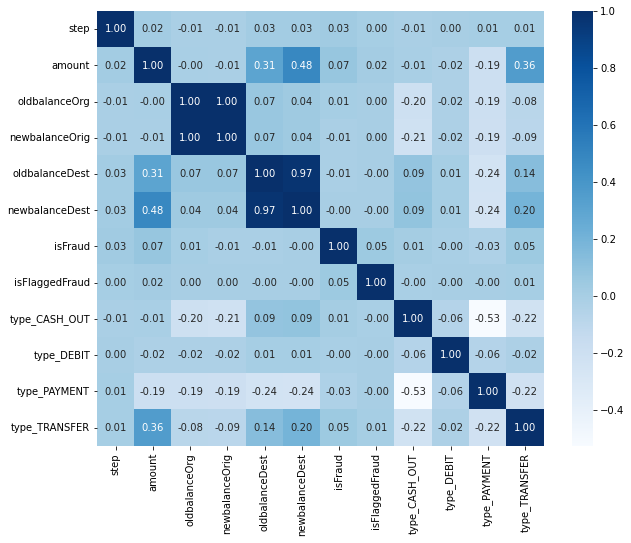

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(df_samp_reg.corr(),cmap="Blues",annot=True,fmt='.2f')

In [52]:
df_samp_reg1 = df_samp_reg.drop(['nameOrig','nameDest','isFlaggedFraud','oldbalanceOrg','newbalanceDest'],axis=1)

In [53]:
df_samp_reg1.shape

(636262, 9)

In [54]:
# Importing library for data scaling.

In [55]:
from sklearn.preprocessing import RobustScaler

In [56]:
scaler = RobustScaler()

In [57]:
df_samp_reg1_scaled=pd.DataFrame((scaler.fit_transform(df_samp_reg1)),columns=df_samp_reg1.columns)

In [58]:
df_samp_reg1_scaled.head()

,step,amount,newbalanceOrig,oldbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.332402,1.299719,0.000000,-0.142304,0.0,1.0,0.0,0.0,0.0
1,-0.086592,-0.118800,0.000000,-0.142304,0.0,0.0,0.0,1.0,0.0
2,-0.617318,1.385519,0.000000,-0.142304,0.0,1.0,0.0,0.0,0.0
3,0.907821,0.851604,0.000000,0.126808,0.0,1.0,0.0,0.0,0.0
4,-1.114525,1.334318,2.422394,-0.142304,0.0,0.0,0.0,0.0,0.0


In [59]:
# First, let us get a baseline regression model.

In [60]:
# Splitting the DataFrame into dependent and independent variables.

In [61]:
y=df_samp_reg1_scaled.isFraud
x=df_samp_reg1_scaled.drop('isFraud',axis=1)

In [62]:
# Splitting the variables into train and test data.

# stratify=target, so that the target variable is split according to weight.

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2,stratify=y)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import metrics

In [ ]:
# Fitting the train data on the logistic regression model.

In [65]:
reg=linear_model.LogisticRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_train)
print("accuracy: "+ str(reg.score(x_train,y_train)*100) + "%")

accuracy: 99.87230088269558%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
# Confusion matrix.

In [66]:
cm = metrics.confusion_matrix(y_train, y_pred)
cm

array([[508349,      3],
       [   647,     10]], dtype=int64)

In [124]:
# Visualizing the confusion matrix.

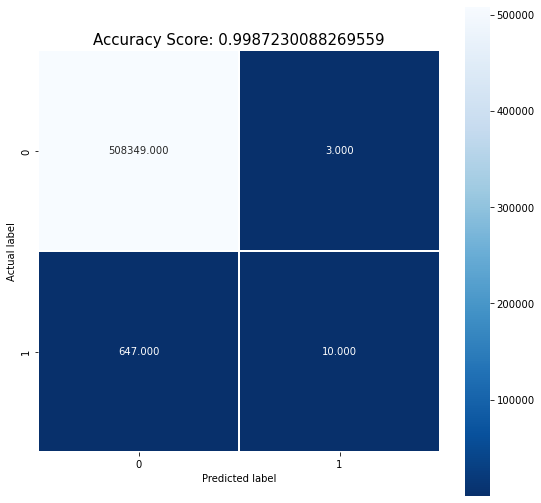

In [67]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg.score(x_train,y_train))
plt.title(all_sample_title, size = 15);

In [68]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Precision:",metrics.precision_score(y_train, y_pred))
print("Recall:",metrics.recall_score(y_train, y_pred))
print("F1 Score:",metrics.f1_score(y_train, y_pred,average="weighted"))

Accuracy: 0.9987230088269559
Precision: 0.7692307692307693
Recall: 0.015220700152207
F1 Score: 0.9981096948605576


In [69]:
# Test data

In [70]:
y_pred_test=reg.predict(x_test)
print("accuracy: "+ str(reg.score(x_test,y_test)*100) + "%")

accuracy: 99.87269455337005%


In [71]:
cm_test = metrics.confusion_matrix(y_test, y_pred_test)
cm_test

array([[127089,      0],
       [   162,      2]], dtype=int64)

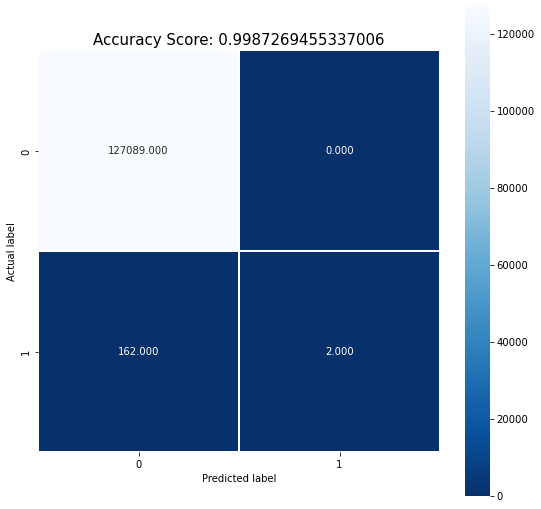

In [72]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg.score(x_test,y_test))
plt.title(all_sample_title, size = 15);

In [73]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("F1 Score:",metrics.f1_score(y_test, y_pred_test,average="weighted"))

Accuracy: 0.9987269455337006
Precision: 1.0
Recall: 0.012195121951219513
F1 Score: 0.9981061617375276


In [ ]:
# We can clearly see that the above model with the imbalanced data is not good. The accuracy might be 99.8%, but the
# Recall is only 1%.

In [125]:
# The above model failed.

In [74]:
# Now, we will use synthetic oversampling to balance the target data imbalance.

# Using SMOTE-EEN on the data to oversample and then undersample

In [ ]:
# Importing library for SMOTE-ENN

In [75]:
from imblearn.combine import SMOTEENN

In [76]:
smt = SMOTEENN(random_state=42,sampling_strategy='all')

In [77]:
x1, y1 = smt.fit_resample(x, y)

In [78]:
x1.shape

(1255202, 8)

In [ ]:
# Above is the resampled data.

In [79]:
# Logistic Regression on SMOTE resampled data.

In [80]:
x_train_smt,x_test_smt,y_train_smt,y_test_smt=train_test_split(x1,y1,random_state=0,test_size=0.2,stratify=y1)

In [ ]:
# Fitting the train data on logistic regression model.

In [81]:
reg_smt=linear_model.LogisticRegression()
reg_smt.fit(x_train_smt,y_train_smt)
y_pred_smt=reg_smt.predict(x_train_smt)
print("accuracy: "+ str(reg_smt.score(x_train_smt,y_train_smt)*100) + "%")

accuracy: 83.80090443663914%


In [82]:
cm_smt = metrics.confusion_matrix(y_train_smt, y_pred_smt)
cm_smt

array([[390541, 107432],
       [ 55233, 450955]], dtype=int64)

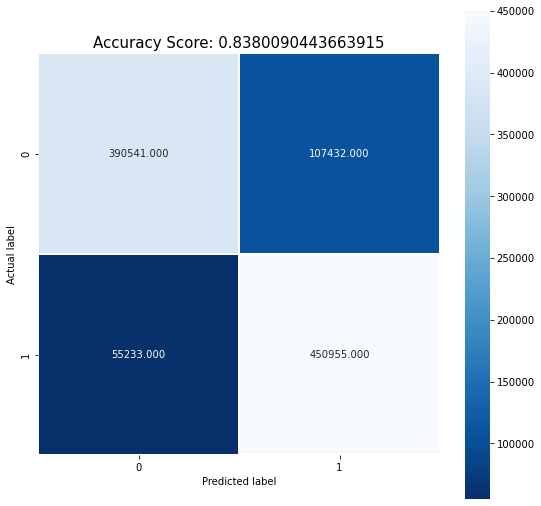

In [83]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_smt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg_smt.score(x_train_smt,y_train_smt))
plt.title(all_sample_title, size = 15);

In [84]:
print("Accuracy:",metrics.accuracy_score(y_train_smt, y_pred_smt))
print("Precision:",metrics.precision_score(y_train_smt, y_pred_smt))
print("Recall:",metrics.recall_score(y_train_smt, y_pred_smt))
print("F1 Score:",metrics.f1_score(y_train_smt, y_pred_smt,average="weighted"))

Accuracy: 0.8380090443663915
Precision: 0.8076029706995328
Recall: 0.8908844144863174
F1 Score: 0.8375005821402794


In [85]:
# Prediction on Test Data

In [86]:
y_pred_smt_test=reg_smt.predict(x_test_smt)
print("accuracy: "+ str(reg_smt.score(x_test_smt,y_test_smt)*100) + "%")

accuracy: 83.71142562370291%


In [87]:
cm_smt_test = metrics.confusion_matrix(y_test_smt, y_pred_smt_test)
cm_smt_test

array([[ 97511,  26982],
       [ 13909, 112639]], dtype=int64)

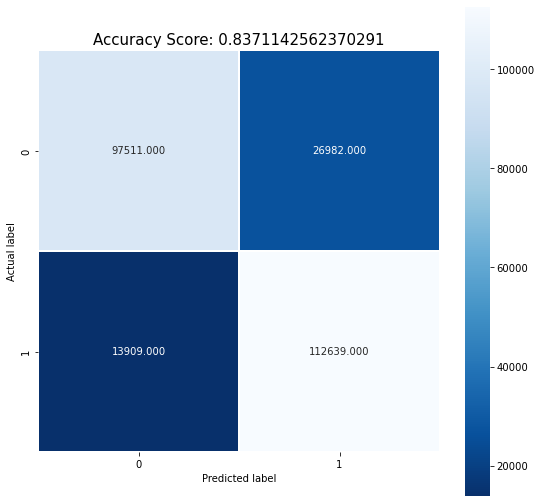

In [88]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_smt_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg_smt.score(x_test_smt,y_test_smt))
plt.title(all_sample_title, size = 15);

In [89]:
print("Accuracy:",metrics.accuracy_score(y_test_smt, y_pred_smt_test))
print("Precision:",metrics.precision_score(y_test_smt, y_pred_smt_test))
print("Recall:",metrics.recall_score(y_test_smt, y_pred_smt_test))
print("F1 Score:",metrics.f1_score(y_test_smt, y_pred_smt_test,average="weighted"))

Accuracy: 0.8371142562370291
Precision: 0.8067482685269408
Recall: 0.8900891361380662
F1 Score: 0.8366012407145013


In [ ]:
# The accuracy has fallen a bit to 83.1%, but the recall has improved greatly to 89%, which was our target.
# This model will capture 89.1% of all fraudlent transactions, which is a significant improvement.


# Random Forest Classification

In [ ]:
# Outlliers do not affect Decision Trees, hence I'll be using non-scaled data.

In [90]:
y=df_samp_reg1.isFraud
x=df_samp_reg1.drop('isFraud',axis=1)

In [ ]:
# Splitting the variables into train and test data.

# stratify=target, so that the target variable is split according to weight.

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2,stratify=y)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import metrics

In [93]:
# Importing libraries necessary for Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [95]:
# Fitting the model with data before SMOTE oversampling and scaling.

In [96]:
model = RandomForestClassifier(random_state=1)
model.fit(x_train,y_train)
y_pred1 = model.predict(x_train)

print("Accuracy Score:",accuracy_score(y_train,y_pred1))

Accuracy Score: 0.9999960707963906


In [ ]:
# Confusion matrix.

In [97]:
cm1 = metrics.confusion_matrix(y_train, y_pred1)
cm1

array([[508352,      0],
       [     2,    655]], dtype=int64)

In [ ]:
# Visualizing the confusion matrix.

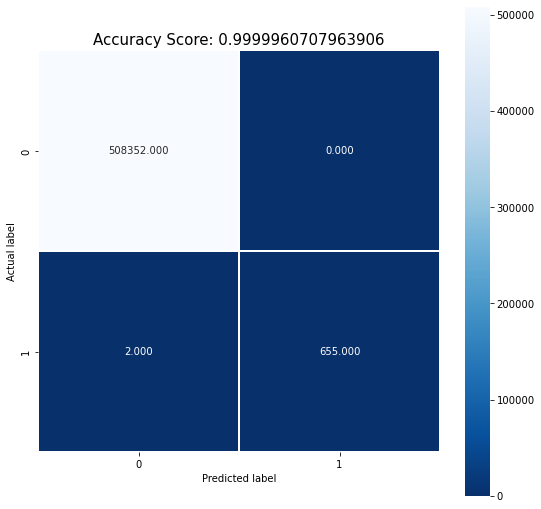

In [98]:
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_train,y_train))
plt.title(all_sample_title, size = 15);

In [99]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred1))
print("Precision:",metrics.precision_score(y_train, y_pred1))
print("Recall:",metrics.recall_score(y_train, y_pred1))
print("F1 Score:",metrics.f1_score(y_train, y_pred1,average="weighted"))

Accuracy: 0.9999960707963906
Precision: 1.0
Recall: 0.9969558599695586
F1 Score: 0.9999960678054356


In [100]:
# Prediction on Test Data

In [101]:
y_pred1_test = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred1_test))

Accuracy Score: 0.999143438661564


In [102]:
cm1_test = metrics.confusion_matrix(y_test, y_pred1_test)
cm1_test

array([[127080,      9],
       [   100,     64]], dtype=int64)

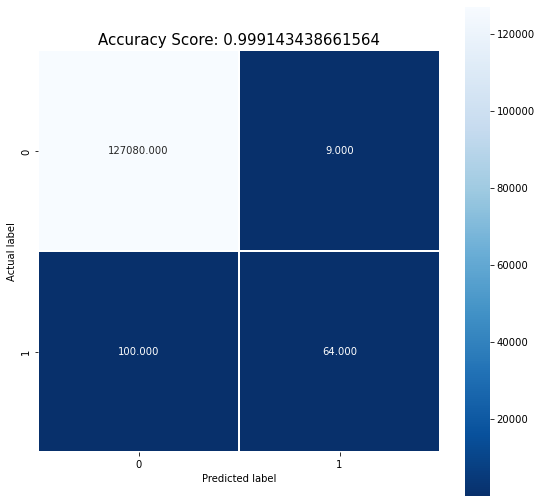

In [103]:
plt.figure(figsize=(9,9))
sns.heatmap(cm1_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test,y_test))
plt.title(all_sample_title, size = 15);

In [104]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1_test))
print("Precision:",metrics.precision_score(y_test, y_pred1_test))
print("Recall:",metrics.recall_score(y_test, y_pred1_test))
print("F1 Score:",metrics.f1_score(y_test, y_pred1_test,average="weighted"))

Accuracy: 0.999143438661564
Precision: 0.8767123287671232
Recall: 0.3902439024390244
F1 Score: 0.9989791466181246


In [ ]:
# We can clearly see that the above model with the imbalanced data is not good. The accuracy might be 99.9%, but the
# Recall is only 39%.

In [105]:
# Using SMOTE-ENN on non-scaled data for Random Forest

In [106]:
from imblearn.combine import SMOTEENN

In [107]:
smt = SMOTEENN(random_state=42,sampling_strategy='all')

In [108]:
x1, y1 = smt.fit_resample(x, y)

In [109]:
x1.shape

(1161650, 8)

In [110]:
# After SMOTEENN

In [111]:
x_train_smt,x_test_smt,y_train_smt,y_test_smt=train_test_split(x1,y1,random_state=0,test_size=0.2,stratify=y1)

In [113]:
# Random Forest Classifier on SMOTE resampled data.

In [114]:
model_smt = RandomForestClassifier(random_state=1)
model_smt.fit(x_train_smt,y_train_smt)
y_pred_smt=model_smt.predict(x_train_smt)
print("accuracy: "+ str(model_smt.score(x_train_smt,y_train_smt)*100) + "%")

accuracy: 99.99989239443894%


In [115]:
cm_smt = metrics.confusion_matrix(y_train_smt, y_pred_smt)
cm_smt

array([[458305,      1],
       [     0, 471014]], dtype=int64)

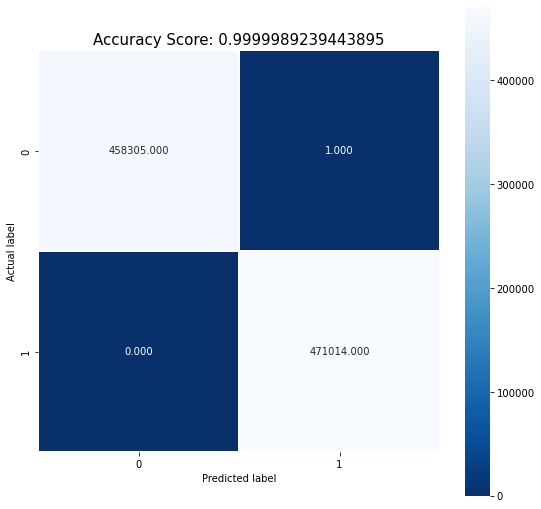

In [116]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_smt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_smt.score(x_train_smt,y_train_smt))
plt.title(all_sample_title, size = 15);

In [117]:
print("Accuracy:",metrics.accuracy_score(y_train_smt, y_pred_smt))
print("Precision:",metrics.precision_score(y_train_smt, y_pred_smt))
print("Recall:",metrics.recall_score(y_train_smt, y_pred_smt))
print("F1 Score:",metrics.f1_score(y_train_smt, y_pred_smt,average="weighted"))

Accuracy: 0.9999989239443895
Precision: 0.9999978769253633
Recall: 1.0
F1 Score: 0.9999989239443735


In [118]:
# Predicting on Test Data

In [119]:
y_pred_smt_test=model_smt.predict(x_test_smt)
print("accuracy: "+ str(model_smt.score(x_test_smt,y_test_smt)*100) + "%")

accuracy: 99.67546162785693%


In [120]:
cm_smt_test = metrics.confusion_matrix(y_test_smt, y_pred_smt_test)
cm_smt_test

array([[113959,    617],
       [   137, 117617]], dtype=int64)

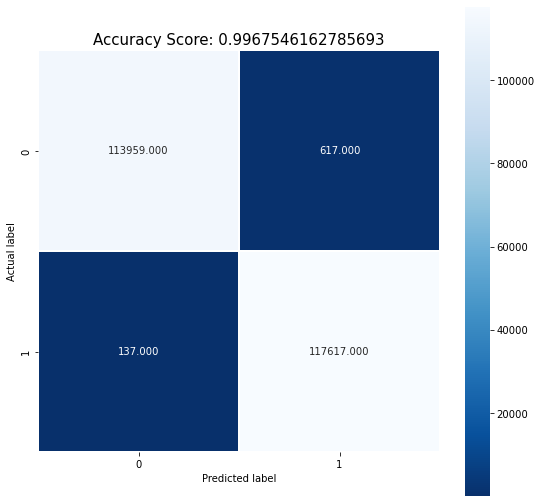

In [121]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_smt_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_smt.score(x_test_smt,y_test_smt))
plt.title(all_sample_title, size = 15);

In [122]:
print("Accuracy:",metrics.accuracy_score(y_test_smt, y_pred_smt_test))
print("Precision:",metrics.precision_score(y_test_smt, y_pred_smt_test))
print("Recall:",metrics.recall_score(y_test_smt, y_pred_smt_test))
print("F1 Score:",metrics.f1_score(y_test_smt, y_pred_smt_test,average="weighted"))

Accuracy: 0.9967546162785693
Precision: 0.9947815349222728
Recall: 0.9988365575691697
F1 Score: 0.9967545106824198


In [126]:
# Accuracy is 99.6% and Recall is 99.88%. F1 Score is 99.6%.

# The scores of validation on the test data prove that the trained model predicts the unseen data correctly.
# All scores for this test data are very close to the scores of the train data.

# This model will capture 99.88% of all fraudlent transactions.

In [127]:
# 1) No null values, outliers mitigated using RobustScaler, dropped 2 multi-collinear columns.

# To remove multi-collinearity, Dimensionality Reduction techniques like Principal Component Analysis can also be implemented.

In [ ]:
# 2) In the classification problems like Fraud detection, there is always target imbalance. In this particular dataset, the
# Non-fradulent to fradulent cases were 99.87:0.13.
# A mere 0.13% transactions were actually fraudlent.

# In such cases, accuracy of the model is irrelevant, as a model like logistic regression will be biased towards the
# majority class and will always predict the outcome as majority class.

# Hence, here, Recall plays an important role. Here, False Negatives are the transactions that were fraudlent, but were 
# predicted as non-fradulent. Hence, if the recall is higher, more transactions will be caught which were predicted as 
# non-fraudlent, but were actually fraudlent.

# Detecting and capturing a fraudlent transaction is the priority, and hence even if more non-fraudlent transactions are 
# classified as fraudlent, it is justifiable, as long as fraudlent transactions are correctly detected.

# The number of False positives and False negatives can be reduced further, with hyperparameter tuning, given more time to
# work on the dataset. Whether a company wants to reduce these will depend on the cost justification, (whether the company is
# willing to spend that extra cost for the marginal benefit), and the processing power.

# (For example, I was unable to use techniques like SMOTE-EEN due to the lack of processing power on my local machine.
# Even decision tree models take a lot of time and processing power to run, hence I have used logistic regression in this example.)

# So, to solve the problem of target imbalance, I have used basic SMOTE technique to oversample the minority class, as to train
# the logistic regression properly.

In [ ]:
# 3) There were not too many variables to begin with. The isFlaggedFradulent variable was irrelevant, as mentioned in my 
# notebook.

# The nameOrg and nameDest columns were not relevant either. Also, to convert them to numerical data using One Hot Encoder or
# other encoders like Label Encoder or Label Binarizer would not be feasible, as the machine learning algorithm would interpret 
# the data incorrectly, giving importance to a higher value, for (ex. 15632) greater importance, than a lower value (ex. 745) 
# lower importance, when we know that there is no such relationship between the categories of those columns.
# Hence, those columns were dropped too.

# As mentioned in the notebook with reason, 2 multi-collinear columns were dropped. With enough processing power and time,
# techniques like PCA can be implemented.

# All other features were selected.

In [128]:
# 4) The accuracy and recall are a good indicator that the model is excellent, at predicting fraudlent transactions.

In [129]:
# 5) The key factors that predict fraudlent transactions are Payment type and amount.
# A large portion of the fraudlent transaction are concentrated below $ 200,000.
# Fraudlent transactions were only found in CASH_OUT and PAYMENT type of transactions.

In [130]:
# 6) Yes, the factors make sense, as per my opinion.
# For example, stolen credit/debit cards can are used to make purchases and payments, which could be a contributing factor 
# towards those specific two types having all the fraudlent transactions in this dataset.

In [131]:
# 7) Building and maintaining AI and ML models enhanced by Reinforcement learning.
# More safety checks in place before approving a transaction.
# Assessing credit scores and risk profiles before approving credit lines to customers.
# Spending analysis of individuals. For example, if a person has never used a card for international transaction and there
# are sudden international charges to their card, they could be flagged as 'might be fraudlent'.

In [132]:
# 8) Determination of AI and ML models can be done with real-time data, matched with the AI/ML's predicted results.
# Checks like credit worthiness can be done manually by humans.
# Systems can be built to automate the process to check discrepancies in spending analysis.